### Oppgave 6 Prediktiv analyse
#### Importerer nødvendige biblioteker

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Valg av flyplass, enten ENOL eller ENBO

In [2]:
#airport = "ENBO"
airport = "ENOL"

In [3]:
file_path = f'../data/csv/{airport}_wind_data.csv'
df_airport = pd.read_csv(file_path)


#### Sjekker informasjon om data frame

In [4]:
df_airport.shape
df_airport.round(1).info()
df_airport.describe(include='all').round(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17708 entries, 0 to 17707
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airport         17708 non-null  object 
 1   Date/time       17708 non-null  object 
 2   Wind_direction  17708 non-null  int64  
 3   Wind_speed      17708 non-null  int64  
 4   Gust_speed      685 non-null    float64
 5   Temperature     17707 non-null  float64
 6   Dewpoint        17707 non-null  float64
 7   QNH             17708 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.1+ MB


,Airport,Date/time,Wind_direction,Wind_speed,Gust_speed,Temperature,Dewpoint,QNH
count,17708,17708,17708.0,17708.0,685.0,17707.0,17707.0,17708.0
unique,1,1493,NaN,NaN,NaN,NaN,NaN,NaN
top,ENOL,201850Z,NaN,NaN,NaN,NaN,NaN,NaN
freq,17708,14,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,182.3,11.8,40.3,8.0,3.9,1007.9
std,NaN,NaN,93.3,7.1,7.4,6.6,6.4,12.9
min,NaN,NaN,0.0,0.0,19.0,-14.0,-16.0,956.0
25%,NaN,NaN,120.0,7.0,35.0,4.0,0.0,1000.0
50%,NaN,NaN,140.0,11.0,40.0,8.0,4.0,1008.0
75%,NaN,NaN,260.0,16.0,44.0,13.0,9.0,1017.0


#### Vindhastighet over tid
ett punkt per dag i ett år

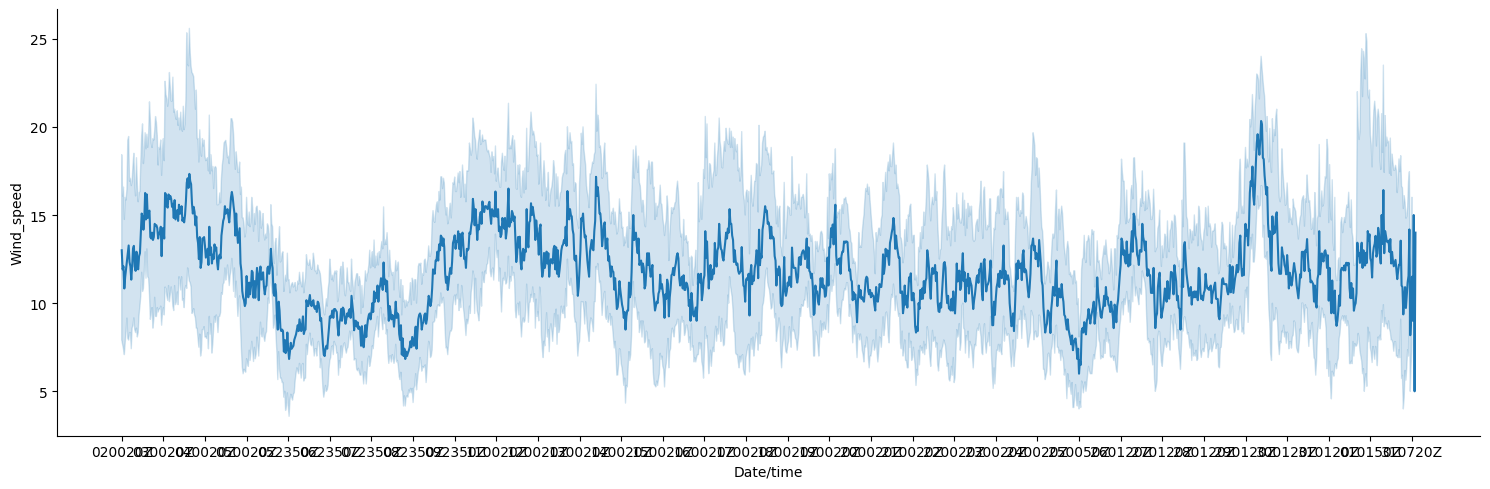

In [5]:
df_hver48 = df_airport.iloc[48:]

plot1 = sns.relplot(x="Date/time", y="Wind_speed", kind="line", data=df_hver48, height=5, aspect=3)
plot1.fig.suptitle("", y=1.03)
ticks, labels = plt.xticks()
plt.xticks(ticks[::48], labels[::48])
plt.show()


### Tilbake til data cleaning og missing data

Matrise for visualisering av missing data


<Axes: >

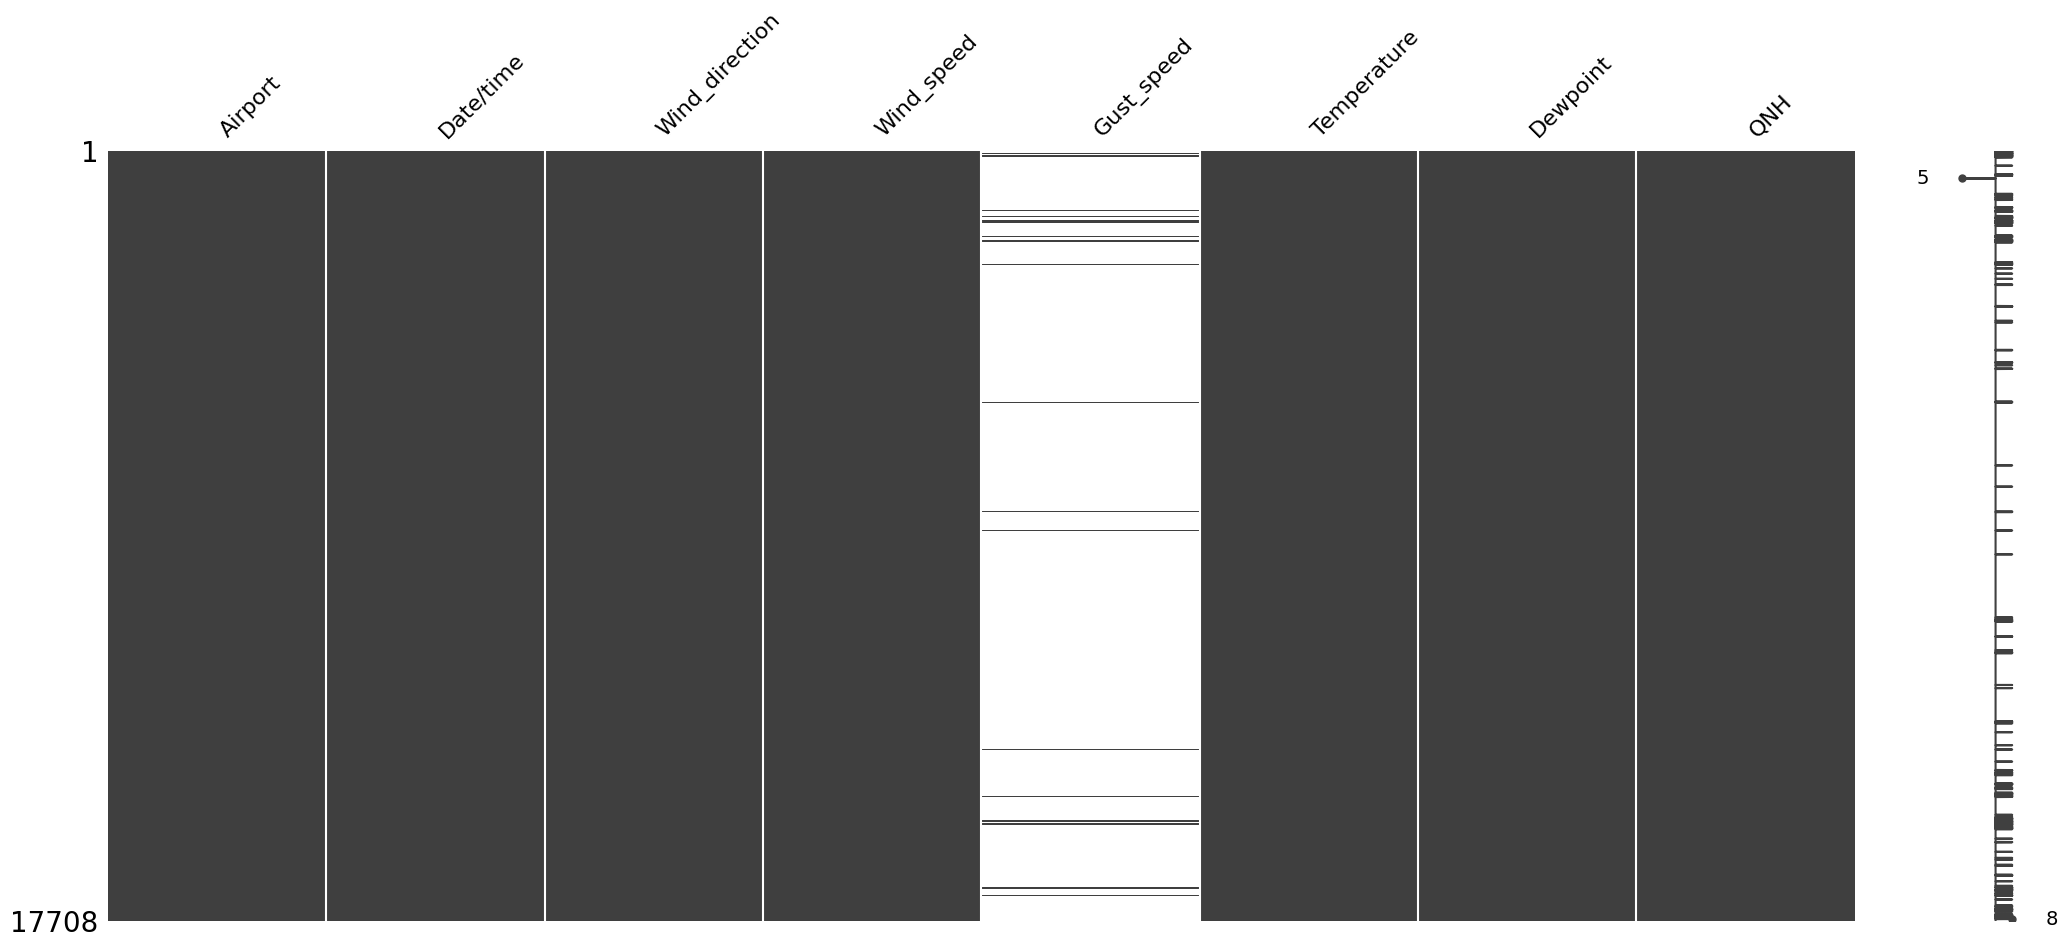

In [6]:
print("Matrise for visualisering av missing data")
msno.matrix(df_airport)

Ser etter outliers


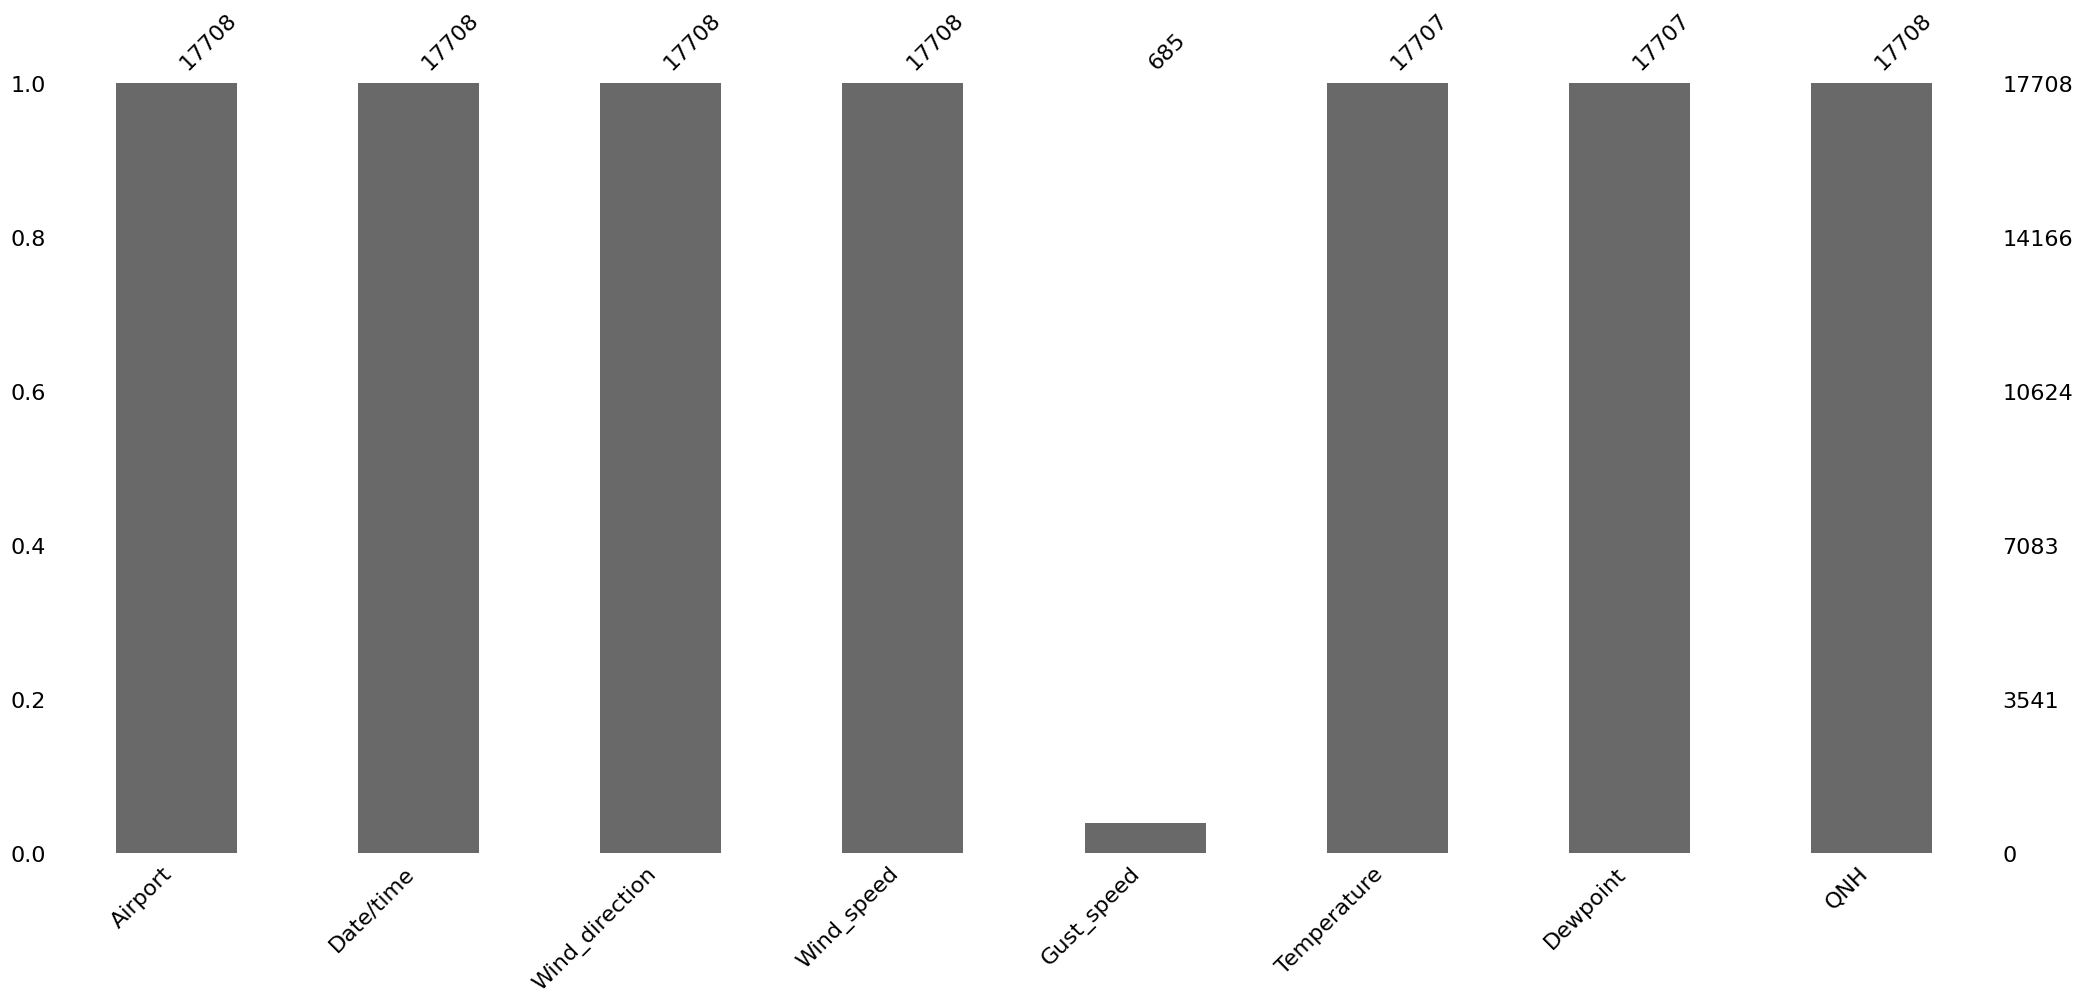

In [7]:
msno.bar(df_airport)
print("Ser etter outliers")

In [8]:
# Drop duplicates
df_airport = df_airport.drop_duplicates(subset=["Date/time"], keep="last")
df_airport.shape

(1493, 8)

In [9]:
# Sorterer dataframen etter dato 
df_airport.sort_values(by=['Airport'], inplace=True)
df_airport.reset_index(drop=True, inplace=True)

In [10]:
# Fjerner unødvendige kolonner
df_airport = df_airport.drop(columns=['Airport', 'Date/time'])
print(df_airport.isnull().sum(axis=0)* 100/len(df_airport))

Wind_direction     0.000000
Wind_speed         0.000000
Gust_speed        90.689886
Temperature        0.000000
Dewpoint           0.000000
QNH                0.000000
dtype: float64


<Axes: >

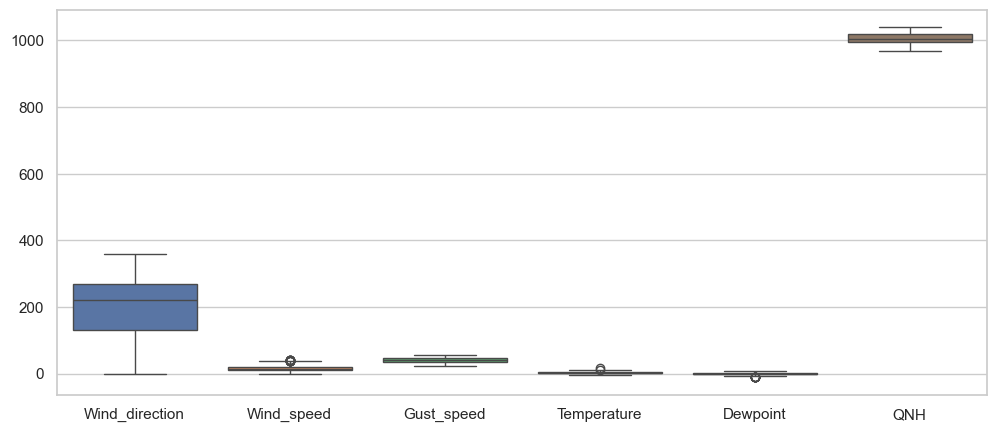

In [11]:
# Visualiserer data
sns.set(rc={'figure.figsize':(12,5)}, style='whitegrid')
sns.boxplot(data=df_airport)

In [12]:
df_airport = df_airport[df_airport['Wind_speed'] > 0]
df_airport = df_airport[df_airport['Gust_speed'] > 0]
df_airport = df_airport[df_airport['Wind_direction'] > 0]
df_airport = df_airport[df_airport['Wind_direction'] < 360]

df_airport.reset_index(inplace=True, drop=True)
df_airport.shape


(139, 6)

IndexError: index 2 is out of bounds for axis 0 with size 2

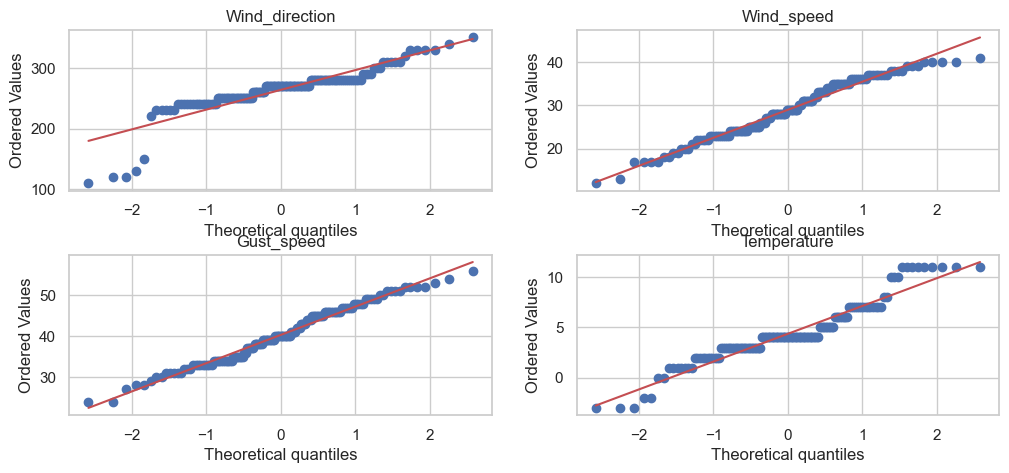

In [13]:
fig, axes = plt.subplots(2,2)
plt.subplots_adjust(hspace = 0.4)
for i, column in enumerate(df_airport.columns):
    stats.probplot(df_airport[column], dist="norm", plot=axes[i//2, i%2])
    axes[int(i/2), i%2].set_title(column)
plt.show()

In [ ]:
fig, axes = plt.subplots(2,2)
df_airport.hist(ax=axes[int(i/2)][i%2])
plt.show()

### Sortering av data likt oppgave 4 etter data cleaning med visualisering

In [ ]:
df_airport.groupby('Wind_direction').mean()

In [ ]:
# Plot med hensyn på vindretning og vindkast-hastighet etter data cleaning
plot1 = sns.relplot(x="Wind_direction", y="Gust_speed", kind="line", data=df_airport)
_ = plot1.fig.suptitle("Vindkast-hastighet og vindretning", y=1.03)


In [ ]:
df_airport.groupby('QNH').mean()

In [ ]:
# Plot med hensyn på vindretning og vindkast-hastighet etter data cleaning
plot2 = sns.relplot(x="Wind_direction", y="QNH", kind="line", data=df_airport)
_ = plot2.fig.suptitle("Trykk (QNH) og vindretning", y=1.03)


### Predektiv analyse
Lineær regresjon

In [ ]:
reg = LinearRegression()

# Husk dobbeltklammer her!
x = df_airport[['Wind_speed', 'Gust_speed', 'QNH']]
y = df_airport['Wind_direction']

reg.fit(x, y)

print(f"Regresjonskoeffisienter. Intercept: {reg.intercept_.round(2)}")

In [ ]:
# Definerer input og target
x = df_airport[['Wind_direction', 'Wind_speed', 'Gust_speed']]
y = df_airport['QNH']

# Deler data inn i treningssett og testsett
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Tren modellen
modell = LinearRegression()
modell.fit(x_train, y_train)

# Prediksjon på testdata
y_pred = modell.predict(x_test)

# Skrive ut resultater
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²-score:", r2_score(y_test, y_pred))
print("Koeffisienter:", modell.coef_)
print("Intercept:", modell.intercept_)


#### Scatter plot for prediksjon av QNH sammenlignet med faktisk QNH

In [ ]:
coeffs = np.polyfit(y_test, y_pred, deg=2)
trendline = np.poly1d(coeffs)
x_vals = np.linspace(970, 1030, 100)

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(x_vals, trendline(x_vals), 'r--', label='Trendlinje')
plt.xlim(970, 1030)
plt.ylim(970, 1030)
plt.xlabel("Faktisk QNH")
plt.ylabel("Prediktert QNH")
plt.title("Faktisk mot Forutsagt QNH")
plt.grid(True)
plt.show()


Vi ser at det er vanskelig å predektere QNH med tanke på vindretning og vindkast-hastighet.
Vi ser også at det er vanskelig å forutsi trykket i hver ende, altså når trykket er lavt og høyt.
Vi ser derimot at når trykket er rundt 1000, altså stabilt, er det lettere å forutsi trykket.

I dette tilfellet mener vi det er naturlig med en andregrads-trendlinje, da lavtrykk og høytrykk er mer ustabilt og vanskligere å forutsi. Når det er nøytralt trykk (rundt 1000 i QNH) er det enklere å forutsi, da dette er betydelig mer stabile værforhold. Trendlinjen gir en indikasjon på at det er noe sammenheng mellom de to variablene.
Det er naturlig at det er flere ting en vinddata som påvirker trykk (QNH). Dersom prediksjonen skulle vært mer nøyaktig hadde det vært naturlig å inkludere flere typer værdata, som for eksempel temeper og duggpunkt.

In [ ]:
features = x.columns
for feature, coef in zip(features, modell.coef_):
    print(f"{feature}: {coef:.4f}")


### Visualisering av datasett med mangler.

#### Reintroduserer datasettet som mangler april

In [15]:
file_path_missing_data = '../data/csv/ENOL_wind_data_missing_april.csv'
df_airport_missing_data = pd.read_csv(file_path_missing_data) # Datasett som mangler april

#### Matrise for missing data april

I 03_databehandling identifiserte vi et datasett som manglet hele april, nedenfor ser vi på en visualisering av datasettet.

In [ ]:
msno.matrix(df_airport_missing_data)

Matrisen tydeliggjør hvor datasettet har mangler
#### Bar-chart for missing data for april

In [ ]:
msno.bar(df_airport_missing_data)

#### Scatterplot av vindhastighet over tid kl. 1220 hver dag i et år

In [ ]:
subset = df_airport_missing_data.copy()
subset_every_48 = subset.iloc[24::48].copy()
subset_every_48 = subset_every_48.iloc[:366].copy()
subset_every_48["Days"] = np.arange(1, len(subset_every_48) + 1)

# Plotting
plot1 = sns.relplot(x="Days", y="Wind_speed", kind="scatter", data=subset_every_48, height=5, aspect=3)
plot1.fig.suptitle("", y=1)

plt.show()


#### Prediksjon av vindhastighet kl. 1220 i april

In [ ]:
df_airport_missing_data

In [ ]:
# Definerer input og target
#df_airport_missing_data.dropna()
data = df_airport_missing_data[['Wind_direction', 'Gust_speed', 'QNH', 'Wind_speed']].dropna()
x = data[['Wind_direction', 'Gust_speed', 'QNH']].dropna()
y = data['Wind_speed']

# Deler data inn i treningssett og testsett
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Tren modellen
modell = LinearRegression()
modell.fit(x_train, y_train)

# Prediksjon på testdata
y_pred = modell.predict(x_test)

# Skrive ut resultater
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²-score:", r2_score(y_test, y_pred))
print("Koeffisienter:", modell.coef_)
print("Intercept:", modell.intercept_)

#### Korrelasjon mellom vindhastighet og vindretning, vindkast-hastighet og Trykk (QNH)

In [ ]:
max_lag = 200
lags = np.arange(-max_lag, max_lag + 1)

plt.figure(figsize=(12, 8))

for col in ['Wind_direction', 'Gust_speed', 'QNH']:
    cross_corr = [data['Wind_speed'].corr(data[col].shift(lag)) for lag in lags]
    plt.plot(lags, cross_corr, label=col)

plt.title('Kryss-korrelasjon mellom vindhastighet og andre variabler med forsinkelse')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Forsinkelse')
plt.ylabel('Korrelasjon')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
correlation_1 = data['Wind_speed'].corr(data['Gust_speed'])
correlation_2 = data['Wind_speed'].corr(data['Wind_direction'])
correlation_3 = data['Wind_speed'].corr(data['QNH'])

print(f"Korrelasjon mellom vindhastighet og vindkast-hastighet er {correlation_1.round(2)}")
print(f"Korrelasjon mellom vindhastighet og vindretning er {correlation_2.round(2)}")
print(f"Korrelasjon mellom vindhastighet og trykk (QNH) er {correlation_3.round(2)}")

Vi ser at det er stor korrelasjon mellom vindhastighet og vindkast-hastighet. Ingen korrelasjon mellom retning og vindhastighet. Og en liten til middels korrelasjon mellom lavtrykk og høy vindhastighet.

Med bakgrunn i denne informasjonen kan vi kutte ut vindretning i prediksjonen, da denne har ingen korrelasjon.
#### Scatter plot for prediksjon av vindhastighet sammenlignet med faktisk vindhastighet

In [ ]:
coeffs = np.polyfit(y_test, y_pred, deg=1)
trendline = np.poly1d(coeffs)
x_vals = np.linspace(0, 70, 100)

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(x_vals, trendline(x_vals), 'r--', label='Trendlinje')
plt.xlim(0, 70)
plt.ylim(0, 70)
plt.xlabel("Faktisk vindhastighet")
plt.ylabel("Prediktert vindhastighet")
plt.title("Faktisk mot prediktert vindhastighet")
plt.grid(True)
plt.show()

#### Vindretning over tid med prediksjon for april (Ikke ferdig)

In [ ]:
subset = df_airport_missing_data.copy()
subset_every_48 = subset.iloc[24::48].copy()
subset_every_48 = subset_every_48.iloc[:366].copy()
subset_every_48["Days"] = np.arange(1, len(subset_every_48) + 1)

# Plotting
plot1 = sns.relplot(x="Days", y="Wind_speed", kind="scatter", data=subset_every_48, height=5, aspect=3)
plot1.fig.suptitle("", y=1)

plt.show()
